# 1. Load the dataset and explore the variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
data=pd.read_csv('customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
data.isna().sum()
#No NaNs to worry about

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#senior cityzen is also a categorical, will change datatype. 
#Total Charges should be a float, will change datatype. 

In [9]:
# data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [10]:
# data['TotalCharges'] = data.TotalCharges.astype(float)

In [11]:
data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [13]:
# First checking what's in churn then changing it to a numerical

In [14]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [15]:
data['Churn'].replace('No', '0', inplace=True)

In [16]:
data['Churn'].replace('Yes', '1', inplace=True)

In [17]:
data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [18]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
data['Churn'] = data.Churn.astype(int)

In [20]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [21]:
data_num = data._get_numeric_data()

In [22]:
data_num.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


# 3. Extract the target variable.

In [24]:
X = data_num.drop('Churn',axis = 1)
y = data_num['Churn']

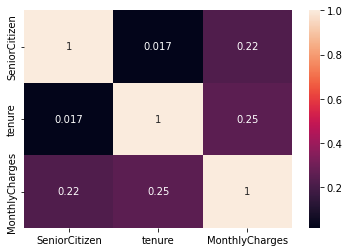

In [25]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# 4. Extract the independent variables and scale them.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

In [29]:
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.436091,-1.282882,-1.310046
1,-0.436091,-1.037857,0.344832
2,-0.436091,-1.160369,-1.484331
3,-0.436091,-0.139429,0.373049
4,-0.436091,-1.201207,0.343172


# 5. Build the logistic regression model.

In [31]:
y_train.head()

6607    1
2598    0
2345    0
4093    0
693     1
Name: Churn, dtype: int64

In [32]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [34]:
LR.score(X_test_scaled, y_test)

0.7978421351504826

# 6. Evaluate the model.

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6964856230031949
recall:  0.4551148225469729
f1:  0.5505050505050505


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1187,   95],
       [ 261,  218]])

In [37]:
#We can see the model isn't very helpful, scores are low and confusion high. We know the 

# 7. Even a simple model will give us more than 70% accuracy. Why?

In [ ]:
# Because of the imbalance, we could get 70% accuracy even without a model. 

# Oversampling

In [38]:
from sklearn.utils import resample

In [39]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.436091,-1.282882,-1.310046,1
1,-0.436091,-1.037857,0.344832,0
2,-0.436091,-1.160369,-1.484331,0
3,-0.436091,-0.139429,0.373049,0
4,-0.436091,-1.201207,0.343172,1


In [41]:
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [42]:
display(no_churn.shape)
display(yes_churn.shape)

(3892, 4)

(1390, 4)

In [43]:
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn),#<- make both sets the same size
                                    random_state=0)

In [44]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3892, 4)

(3892, 4)

In [45]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
1,-0.436091,-1.037857,0.344832,0
2,-0.436091,-1.160369,-1.484331,0
3,-0.436091,-0.139429,0.373049,0
6,-0.436091,-1.037857,-0.978074,0
8,-0.436091,1.616588,0.902544,0


In [46]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [59]:
LR_over = LogisticRegression(max_iter=1000)
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5163120567375886
recall:  0.7599164926931107
f1:  0.6148648648648649


In [66]:
LR_over.score(X_test_scaled, y_test)

0.7410562180579217

In [60]:
confusion_matrix(y_test,pred)

array([[941, 341],
       [115, 364]])

# Undersampling

In [52]:
no_churn_undersampled = resample(no_churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_churn),
                                    random_state=0)

In [53]:
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1390, 4)

(1390, 4)

In [54]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled])
train_undersampled.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.436091,-1.282882,-1.310046,1
4,-0.436091,-1.201207,0.343172,1
5,2.293097,-1.282882,-1.293447,1
7,-0.436091,0.799836,1.543248,1
9,-0.436091,0.922348,1.061890,1


In [55]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [56]:
from sklearn.linear_model import LogisticRegression

LR_under = LogisticRegression(max_iter=1000)
LR_under.fit(X_train_under, y_train_under)
pred = LR_under.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5168539325842697
recall:  0.7682672233820459
f1:  0.617968094038623


In [67]:
LR_under.score(X_test_scaled, y_test)

0.7416240772288473

In [57]:
confusion_matrix(y_test,pred)

array([[938, 344],
       [111, 368]])

In [51]:
# 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [63]:
X_train_SMOTE.shape

(7784, 3)

In [64]:
from sklearn.linear_model import LogisticRegression

LR_SMOTE = LogisticRegression(max_iter=1000)
LR_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR_SMOTE.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.5162659123055162
recall:  0.7620041753653445
f1:  0.6155143338954469


In [68]:
LR_SMOTE.score(X_test_scaled, y_test)

0.7410562180579217

In [65]:
confusion_matrix(y_test,pred)

array([[940, 342],
       [114, 365]])